<a href="https://colab.research.google.com/github/AlexMa123/BIU-Computational-Physics-2022/blob/main/Lecture2%20-%20fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fractal

## Review

### Why do we need fractals?
Euclidian geometry cannot describe complex structures in nature, since it deals only with simple shapes and forms such as straight lines, triangles, circles and so on. However, nature doesn't have such simple structures. 

|![example of fractals](https://www.researchgate.net/publication/340926663/figure/fig1/AS:941847388110856@1601565324876/Examples-of-fractal-a-Examples-of-mathematical-fractals-Bovill-1996-b-Examples-of.png)|
|:-:|
|*Fig1.1: a) Examples of mathematical (deterministic) fractals: Koch curve, Sierpinski triangle, dragon curve; b) Fractal in nature*|

### What is a fractal ?
A fractal is an object or quantity that displays `self-similarity`, in a somewhat technical sense, on all scales. The object needs not to exhibit exactly the same structure at all scales, but `the same "type" of structures must appear on all scales`. A plot of the quantity on a log-log graph versus scale then yields a straight line, whose slope is said to be the fractal dimension. The prototypical example for a fractal is the length of a coastline measured with rulers of different lengths.

### Self-similarity and scale invariance

The most important property of fractals is their [self-similarity](https://en.wikipedia.org/wiki/Self-similarity). Self-similarity means the object looks "roughly" the same on any scale. Note the main difference between regular Euclidean space and fractal geometry: whereas regular space is symmetric under translation, in fractals this symmetry is violated. Instead, fractals possess a new symmetry, called scale invarience.

|![Self-similarity](https://i.imgur.com/YHRsUQC.gif)|
|:--:| 
|*Fig 1.3.1 Self-similarity in the Mandelbrot set shown by zooming in on the Feigenbaum point*|

|![scale-invariance](https://upload.wikimedia.org/wikipedia/commons/2/2a/Wiener_process_animated.gif)|
|:--:|
|*Fig 1.3.2 The Wiener process (a stochastic process) is scale-invariant.*|


### Types of Fractals
* Determinisitic
     - also: "ideal fractals"
     - every small part of the picture when magnified properly looks as the whole picture.
     - Examples: Koch curve, dragon fractal, Sierpinski gasket, Mandelbrot set ...
* random
     - Examples: infinite cluster generated by percolation near the critical threshold, scale-free network, Brownian motion (or Wiener process)

### Generate Koch curve by python

> numba is a package used to translate Python functions to optimized machine code at runtime.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import plotly.express as px

In [ ]:
from numba import njit, prange

def mysum(n=10000):
  result = 0
  for i in range(n):
    result = result + i
  return result

@njit
def mysum_njit(n=10000):
    result = 0
    for i in range(n):
        result = result + i
    return result

mysum_njit()

49995000

In [ ]:
%timeit mysum()

1000 loops, best of 5: 628 µs per loop


In [ ]:
%timeit mysum_njit()

The slowest run took 10.96 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 13.3 µs per loop


![koch curve](https://www.researchgate.net/profile/Marcelo-Ribeiro-37/publication/26365833/figure/fig5/AS:310046622797835@1450932283682/Construction-of-the-von-Koch-curve-F-At-each-stage-the-middle-third-of-each-interval.png)

In [ ]:
@njit
def add_trangle(x1, y1, x2, y2):
    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) / 3 # length for each small elements
    angle = np.arctan2(y2 - y1, x2 - x1) # angle of the original line
    x_new = np.zeros(5)
    y_new = np.zeros(5)
    x_new[0], x_new[4] = x1, x2
    y_new[0], y_new[4] = y1, y2
    
    x_new[1] = (x2 - x1) / 3 + x1
    y_new[1] = (y2 - y1) / 3 + y1
    
    x_new[2] = x_new[1] + np.cos(angle + np.pi / 3) * length
    y_new[2] = y_new[1] + np.sin(angle + np.pi / 3) * length
    
    x_new[3] = x2 - (x2 - x1) / 3
    y_new[3] = y2 - (y2 - y1) / 3
    
    return x_new, y_new

@njit
def iterate_koch(x, y):
    """
    Input:
        x: array
        y: array
    Return:
        x_new: array
        y_new: array
    """
    x_new = np.zeros((x.size - 1) * 3 + x.size)
    y_new = np.zeros((y.size - 1) * 3 + y.size)
    for j in range(x.size - 1):
        # insert three points between every two points
        x_new[j * 4: j * 4 + 5], y_new[j * 4: j * 4 + 5] \
                = add_trangle(x[j], y[j], x[j+1], y[j+1])
    return x_new, y_new

@njit
def koch_curve(n, x=np.array([0., 1.]), y=np.array([0., 0.])):
    for i in range(n):
        x, y = iterate_koch(x, y)

    return x, y

In [ ]:
kochcurve = koch_curve(8)
px.line(x=kochcurve[0], y=kochcurve[1])

(0.0, 1.0, -0.01, 0.3)

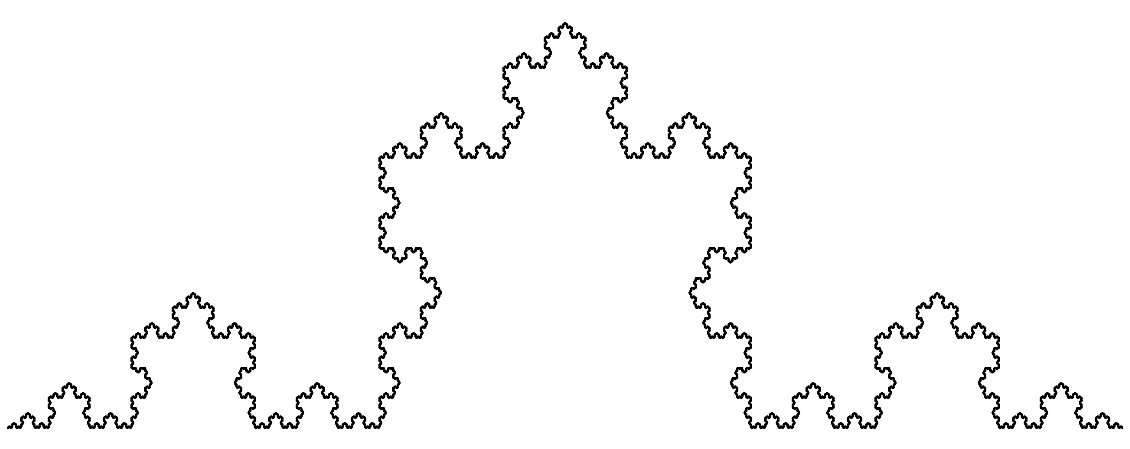

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(kochcurve[0], kochcurve[1], 'k')
plt.xlim(0, 1)
plt.ylim(-0.01, 0.3)
plt.axis('off')

### Estimate fractal dimension by the Box counting method

Box counting is similar to finding the relationship between resolution and image size.

For simpliy 1d 

|![Self-similarity](https://developer.apple.com/design/human-interface-guidelines/ios/images/ImageResolution-Graphic_2x.png)|
|:--:| 
|*Fig 1.6.1 Image size and resolution*|


In [ ]:
!wget https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/source/fractal_tools.pyc?raw=true -O fractal_tools.pyc

--2022-03-30 12:49:37--  https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/source/fractal_tools.pyc?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AlexMa123/BIU-Computational-Physics-2022/raw/main/source/fractal_tools.pyc [following]
--2022-03-30 12:49:37--  https://github.com/AlexMa123/BIU-Computational-Physics-2022/raw/main/source/fractal_tools.pyc
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlexMa123/BIU-Computational-Physics-2022/main/source/fractal_tools.pyc [following]
--2022-03-30 12:49:37--  https://raw.githubusercontent.com/AlexMa123/BIU-Computational-Physics-2022/main/source/fractal_tools.pyc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111

In [ ]:
import numpy as np

def fig_to_array(fig):
    """
    convert matplotlib figure object to numpy array.
    Input:
        fig: matplotlib figure object
    Return:
        numpy array, (height, width, rgba). rgba: red, green blue, alpha(Transparency)。
        (255, 255, 255) is white
    """
    import io
    io_buf = io.BytesIO()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.savefig(io_buf, format='raw')
    io_buf.seek(0)
    data = np.frombuffer(io_buf.getvalue(), dtype=np.uint8)
    data = data.reshape((int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
    io_buf.close()
    return data[:, :, :3]

def rescale(img_matrix, k):
    """
    rescale a image
    """
    img_matrix = 255 - img_matrix
    img_matrix = np.mean(img_matrix, axis=-1)
    # Hint: https://github.com/rougier/numpy-100 (#87)
    raise NotImplemented


def boxcount(img_matrix, k):
    """
    rescale img_matrix by k and count how many occupied sites.
    Input:
        img_matrix: 3d array (height, width, rgb)
        k: int

    Return:
        int
    """
    raise NotImplemented
    
from fractal_tools import rescale, boxcount

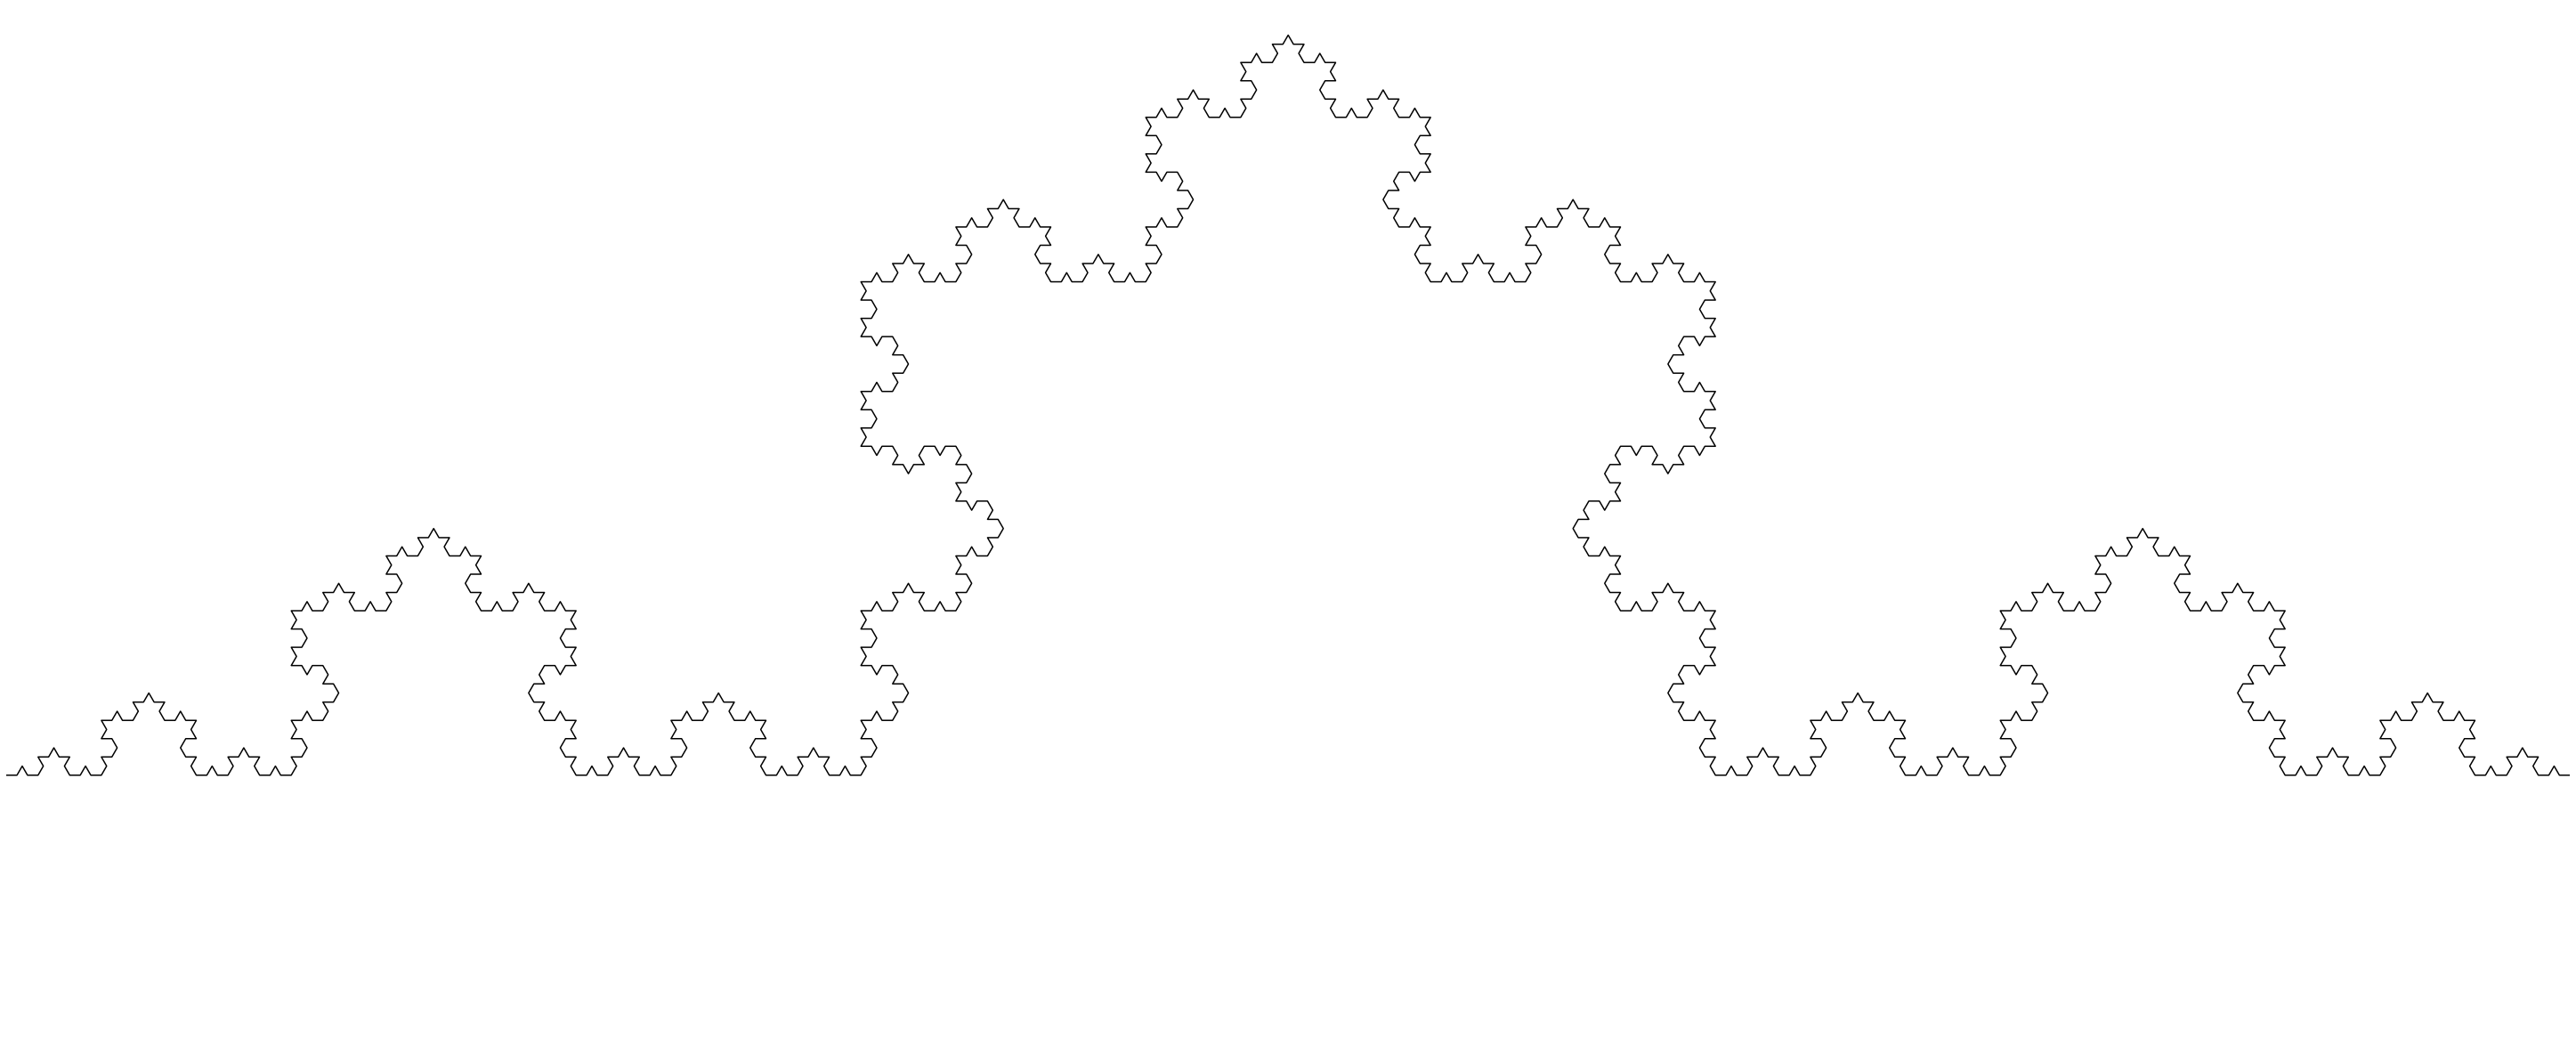

In [ ]:
kochcurve = koch_curve(5)

fig = plt.figure(figsize=(40, 16))
plt.plot(kochcurve[0], kochcurve[1], 'k')
plt.xlim(0, 1)
plt.ylim(-0.1, 0.3)
plt.axis('off')

img_matrix = fig_to_array(fig)

(-0.5, 106.5, 42.5, -0.5)

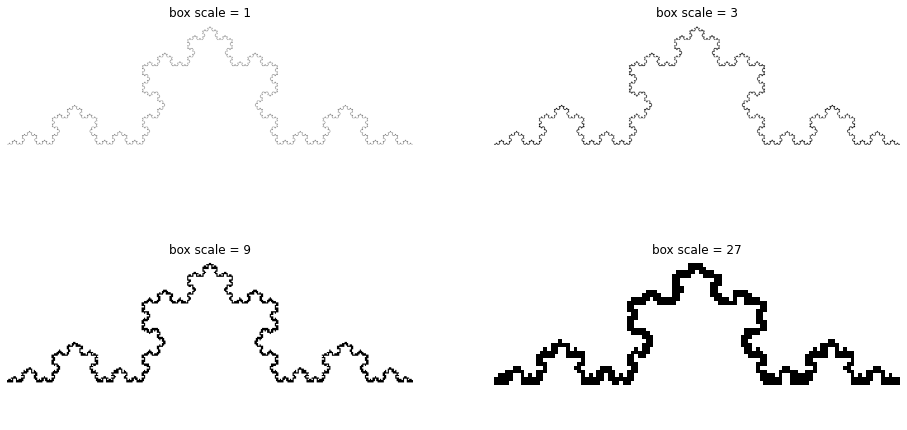

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.imshow(rescale(img_matrix, 1), cmap='Greys')
plt.title("box scale = 1")
plt.axis('off')

plt.subplot(222)
plt.imshow(rescale(img_matrix, 3), cmap='Greys')
plt.title("box scale = 3")
plt.axis('off')

plt.subplot(223)
plt.title("box scale = 9")
plt.imshow(rescale(img_matrix, 9), cmap='Greys')
plt.axis('off')

plt.subplot(224)
plt.title("box scale = 27")
plt.imshow(rescale(img_matrix, 27), cmap='Greys')
plt.axis('off')

In [ ]:
scale = np.arange(3, 17, 1, dtype=int)
mass = np.zeros_like(scale)
for i, s in enumerate(scale):
    mass[i] = boxcount(img_matrix, s)

p = np.polyfit(np.log(scale), np.log(mass), 1)

Text(0.5, 1.0, 'fractal dimension is 1.212')

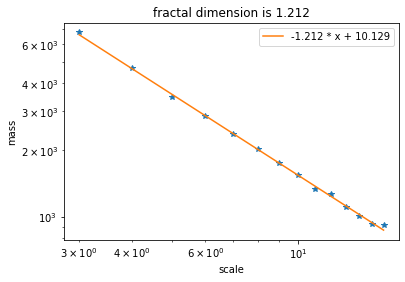

In [ ]:
plt.plot(scale, mass, '*')
plt.plot(scale, (np.exp(p[0] * np.log(scale) + p[1])), label=f'{p[0]:.3f} * x + {p[1]:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('scale')
plt.ylabel('mass')
plt.title(f"fractal dimension is {-p[0]:.3f}")

### One example of fractals in Chaos - The Logistic Map

A very nice video https://www.youtube.com/watch?v=ovJcsL7vyrk

The logistic map is described by the equation:
   $$x_{n+1} = r x_n (1-x_n)$$
  
and $x_n$ is between zero and one, $r$ is the growth factor (growth rate)

In [ ]:
from numba import njit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual

@njit
def logistic_map(r=3, x0=0.5, nstep=50):
    x = np.zeros(nstep)
    x[0] = x0
    for i in range(nstep-1):
        x[i + 1] = r * x[i] * (1 - x[i])
    return x

def plot_logistic(r, x0):
    plt.figure(figsize=(20, 5))
    plt.plot(logistic_map(r, x0, 100), 'o-')
    plt.ylim(0, 1)
    # plt.plot(logistic_map(r, x0 + 1e-4, 100), 'o-')

In [ ]:
interactive(plot_logistic, r=widgets.FloatSlider(
    value=3.3, min=0.5, max=3.99, step=0.01
), x0=widgets.FloatSlider(
    value=0.501, min=0.01, max=1, step=0.01
))

interactive(children=(FloatSlider(value=3.3, description='r', max=3.99, min=0.5, step=0.01), FloatSlider(value…

#### visualize bifuecation

In [ ]:
def bifurcation(r_array, x0=0.5, nstart=10000, nmax=10256):
    """
    calculate stable values for different r
    Input:
        r_array: array, r values
        x0: float
        nstart: int, wait nstart steps before recording
        nmax: int, number of step to iterate.
    Return:
        List of array, length of the list will be the same with the length of r_array
    """
    b = []
    for r in r_array:
        x = logistic_map(r, x0, nmax)
        x = np.round(x[nstart:], 8) # round an array to the given number of decimals.
        b.append(np.unique(x)) # Returns the sorted unique elements of an array. 
    return b        

In [ ]:
r_array = np.arange(0.5, 3.99, 0.001)
b = bifurcation(r_array)

In [ ]:
points = []
for i, r in enumerate(r_array):
    for be in b[i]:
        points.append((r, be))
points = np.array(points)
points.shape

(101623, 2)

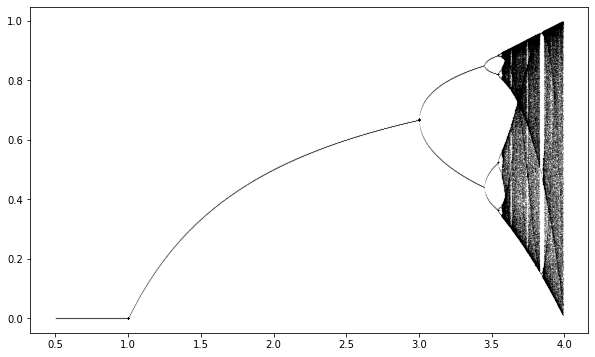

In [ ]:
fig1 = plt.figure(figsize=(10,  6))

plt.plot(points[:, 0], points[:, 1], 'k.', markersize=0.1)
# plt.xlim(3.8, 3.9)

From the bifurcation diagram,  we can find period-doubling bifurcation

![logistic map zoom in](https://juliadynamics.github.io/JuliaDynamics/videos/interact/interactive_chaos_logo.gif)


### Mandelbort set

If we let $z = r (\frac{1}{2} - x)$, $c = \frac{r}{2} (1 - \frac{r}{2})$, the logistic map will be transformed to:
$$z_{n+1} = z_n ^ 2 + c$$

Now let's consider z is a complex number. The Mandelbrot set is the set of complex numbers c for which $z_n$ doesn't diverge to infinity when $z_0 = 0$

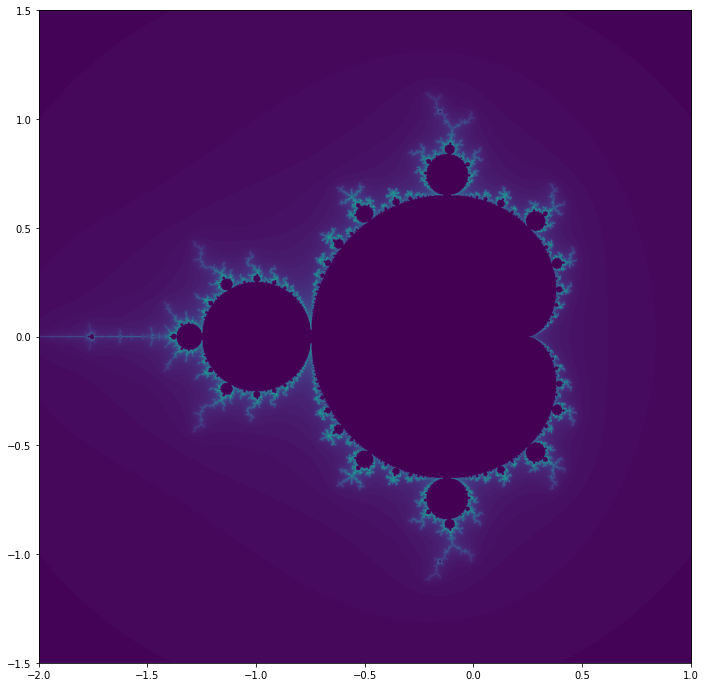

In [ ]:
@njit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    Input:
        x: float
        y: float
        max_iters: int
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 10:
            return i

    return 0

@njit
def create_fractal(x, y, iters):
    """
    Input:
        x: 2d array
        y: 2d array
        iters: int
    """
    color = np.zeros_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            real = x[i, j]
            imag = y[i, j]
            color[i, j] = mandel(real, imag, iters)
           
    return color

x = np.arange(-2, 1, 0.001) ## real part
y = np.arange(-1.5, 1.5, 0.001) ## imag part
x, y = np.meshgrid(x, y)


image = create_fractal(x, y, 100)

plt.figure(figsize=(12, 12))
plt.imshow(image, extent=[-2, 1, -1.5, 1.5])
plt.show()

Figure from wikipedia, logistic map with mandelbort set

![Mandelbort set with logistic](https://www.researchgate.net/profile/Tssachin-Venkatesh/publication/343986739/figure/fig1/AS:930432354897922@1598843768697/The-real-line-on-the-mandelbrot-set-lines-up-with-the-bifurcations-in-the-logistic-map-1.jpg)


# Exercises

1. Summarize what you have learned about fractals

2. Implement the Box Counting Method and use it to calculate the fractal dimension of the Koch curve numerically. Compare to the analytic result.

3. Create the dragon fractal.
Generation rule:
![Dragon fractal](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/139546/9e1f8ce9-3e1f-b5a8-6ede-214a8e933526.png)

Start from a simple strage line. For each iteration, rotate the old curve 90 degree around the last point of the old curve.

In [ ]:

def rotate_curve(x, y, center_x, center_y):
    """
    rotate curve pi/2 around a center point (center_x, center_y)

    Input:
        x: array
        y: array
        center_x: float
        center_y: float

    Return:
        new_x: array
        new_y: array
    """
    raise NotImplementedError


def iterate_dragon(x, y):
    """
    Input:
        x: array
        y: array

    Return:
        new_x: array
        new_y: array
    """
    raise NotImplementedError
    

def dragon_fractal(n, x=np.array([0., 1.]), y=np.array([0., 0.])):
    for i in range(n):
        x, y = iterate_dragon(x, y)
    return x, y


4. Calculate the Feigenbaum constant numerically using the Logistic Map.

![Dragon fractal](https://upload.wikimedia.org/wikipedia/commons/3/3e/Feigenbaum.png)

The Feigenbaum constant is defined as:
$$\delta = \lim_{i→∞ } \frac{L_{i}}{L_{i+1}}$$

Try to find the first three ratio (i=1, 2, 3), it should approch to Feigenbaum constant.